# Решение тестового задания

Есть сайт-конструктор одежды, на который встроен трекер.
События, которые он собирает, описаны здесь https://docs.google.com/spreadsheets/
По второй ссылке - файл с сэмплом данных из этого трекера https://drive.google.com/

Большая часть трафика на сайт приходит с мобильных устройств, это важно. 

Используя любые средства и методы необходимо изучить данные и попытаться ответить на вопрос "Что не так с конверсией?". Артефактом задания является jupyter-ноутбук и сформированный в выводах ответ или перечень гипотез.

In [1]:
# загрузка необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

## 1 Загрузка и предобработка датасета

In [2]:
# загрузка датасета
df = pd.read_csv('C:/Users/Asus/ testcases/datatips/amplitude_test.csv')

In [3]:
# Общая информация о датасете
display(df.head(2))
print('='*40)
print('Общая информация о датасете, пропусках и типа данных')
display(df.info())
print('='*40)
print('Количество полных дубликатов', df.duplicated().sum())

,Unnamed: 0,client_event_time,device_id,session_id,language,country,region,platform,os_name,device_type,device_family,event_type,event_properties,user_properties
0,0,2023-10-24 15:42:24.506,84bfeea2-f6ec-47c1-b9d0-791d1ac5c616,1698162134395,English,United States,North Carolina,Web,Chrome,NaN,K,session_end,{},"{'fbclid': 'IwAR295tUiGCljtUzVYpJ6BMKwmbhOsfWOZzqVdpE29BbIfD4KigCupWriGuo_aem_AZscUccOW47NMeS9RpcIrjMVd2SrITSWAKZyukg-o4f6YwRd8KoxYrFuzlZGElx3rVgGdpf4C_i_JcW8Eeha7VzI', 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'm.facebook.com', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'referrer': 'android-app://m.facebook.com/', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'IwAR295tUiGCljtUzVYpJ6BMKwmbhOsfWOZzqVdpE29BbIfD4KigCupWriGuo_aem_AZscUccOW47NMeS9RpcIrjMVd2SrITSWAKZyukg-o4f6YwRd8KoxYrFuzlZGElx3rVgGdpf4C_i_JcW8Eeha7VzI', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'android-app://m.facebook.com/', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'referring_domain': 'm.facebook.com'}"
1,1,2023-10-25 16:19:00.428,84bfeea2-f6ec-47c1-b9d0-791d1ac5c616,1698250740429,English,United States,North Carolina,Web,Chrome,NaN,K,session_start,{},"{'fbclid': 'IwAR295tUiGCljtUzVYpJ6BMKwmbhOsfWOZzqVdpE29BbIfD4KigCupWriGuo_aem_AZscUccOW47NMeS9RpcIrjMVd2SrITSWAKZyukg-o4f6YwRd8KoxYrFuzlZGElx3rVgGdpf4C_i_JcW8Eeha7VzI', 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'm.facebook.com', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'referrer': 'android-app://m.facebook.com/', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'IwAR295tUiGCljtUzVYpJ6BMKwmbhOsfWOZzqVdpE29BbIfD4KigCupWriGuo_aem_AZscUccOW47NMeS9RpcIrjMVd2SrITSWAKZyukg-o4f6YwRd8KoxYrFuzlZGElx3rVgGdpf4C_i_JcW8Eeha7VzI', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'android-app://m.facebook.com/', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'referring_domain': 'm.facebook.com'}"


Общая информация о датасете, пропусках и типа данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815466 entries, 0 to 815465
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         815466 non-null  int64 
 1   client_event_time  815466 non-null  object
 2   device_id          815466 non-null  object
 3   session_id         815466 non-null  int64 
 4   language           815466 non-null  object
 5   country            814768 non-null  object
 6   region             777472 non-null  object
 7   platform           815466 non-null  object
 8   os_name            815464 non-null  object
 9   device_type        659248 non-null  object
 10  device_family      815464 non-null  object
 11  event_type         815466 non-null  object
 12  event_properties   815466 non-null  object
 13  user_properties    815466 non-null  object
dtypes: int64(2), object(12)
memory usage: 87.1+ MB


None

Количество полных дубликатов 0


In [4]:
# проверим кол-во уникальных значений в каждом столбце
for i in df.columns:
    print(f'Количество уникальных элементов {i}', df[i].nunique())

Количество уникальных элементов Unnamed: 0 815466
Количество уникальных элементов client_event_time 783384
Количество уникальных элементов device_id 13511
Количество уникальных элементов session_id 17599
Количество уникальных элементов language 46
Количество уникальных элементов country 93
Количество уникальных элементов region 988
Количество уникальных элементов platform 1
Количество уникальных элементов os_name 21
Количество уникальных элементов device_type 441
Количество уникальных элементов device_family 377
Количество уникальных элементов event_type 37
Количество уникальных элементов event_properties 24315
Количество уникальных элементов user_properties 11895


Датасет загружен корректно, но требует предобработки:
1) Удаление лишнего столбца
2) Уделение дубликатов
3) Есть некоторое количество пропусков в атрибутах страны и типа устройства, однако для ответа на поставленый вопрос заполнение данных пропусков не требуется
4) Преобразование типов атрибута со временем

In [5]:
# удалим лишний столбец с индексом
df = df.drop(['Unnamed: 0'], axis=1)

Проверим еще раз на полные дубликаты, т.к. удаление столбца могло привести к их появлению. Оказывается, в датсете есть более 30 тыс полных дубликатов. Действительно в наборе данных содержатся полные копии записей событий, в основном - события типа "Configurator start". Скорее всего появление дубликатов связано с ошибками в работе SDK (предположительно - Amplitude)

In [6]:
# полные дубликаты
df.duplicated().sum()

30152

In [7]:
df[df.duplicated()].groupby('event_type')['session_id'].count()

event_type
Configurator start            30135
Work with the configurator        1
[Amplitude] Page Viewed           1
session_end                      14
session_start                     1
Name: session_id, dtype: int64

In [8]:
# просмотр дубликатов
df[df.duplicated()].head()

,client_event_time,device_id,session_id,language,country,region,platform,os_name,device_type,device_family,event_type,event_properties,user_properties
221,2023-11-06 00:45:41.532,e83d5f52-d99c-4b41-abcc-f07d9d1a9a47,1699231051004,Spanish,Spain,Madrid,Web,Chrome,Apple iPhone,Apple iPhone,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://example.com/ooak-man-hoodie-configurator#cloth'}","{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"
231,2023-11-06 00:45:44.200,e83d5f52-d99c-4b41-abcc-f07d9d1a9a47,1699231051004,Spanish,Spain,Madrid,Web,Chrome,Apple iPhone,Apple iPhone,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://example.com/ooak-man-hoodie-configurator#color'}","{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"
250,2023-11-06 00:45:47.250,e83d5f52-d99c-4b41-abcc-f07d9d1a9a47,1699231051004,Spanish,Spain,Madrid,Web,Chrome,Apple iPhone,Apple iPhone,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://example.com/ooak-man-hoodie-configurator#color'}","{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"
259,2023-11-06 00:45:48.783,e83d5f52-d99c-4b41-abcc-f07d9d1a9a47,1699231051004,Spanish,Spain,Madrid,Web,Chrome,Apple iPhone,Apple iPhone,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://example.com/ooak-man-hoodie-configurator#color'}","{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"
263,2023-11-06 00:45:48.786,e83d5f52-d99c-4b41-abcc-f07d9d1a9a47,1699231051004,Spanish,Spain,Madrid,Web,Chrome,Apple iPhone,Apple iPhone,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://example.com/ooak-man-hoodie-configurator#color'}","{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"


In [9]:
# убедимся в том, что это действительно одни и теже записи на примере случайного дубля
df.query('(session_id == 1699231051004) & (client_event_time == "2023-11-06 00:45:41.532")')

,client_event_time,device_id,session_id,language,country,region,platform,os_name,device_type,device_family,event_type,event_properties,user_properties
220,2023-11-06 00:45:41.532,e83d5f52-d99c-4b41-abcc-f07d9d1a9a47,1699231051004,Spanish,Spain,Madrid,Web,Chrome,Apple iPhone,Apple iPhone,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://example.com/ooak-man-hoodie-configurator#cloth'}","{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"
221,2023-11-06 00:45:41.532,e83d5f52-d99c-4b41-abcc-f07d9d1a9a47,1699231051004,Spanish,Spain,Madrid,Web,Chrome,Apple iPhone,Apple iPhone,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://example.com/ooak-man-hoodie-configurator#cloth'}","{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"


In [10]:
# удаление полных дубликатов
df = df.drop_duplicates()

In [11]:
#преобразовнаие времени
df['client_event_time'] = pd.to_datetime(df['client_event_time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785314 entries, 0 to 815465
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   client_event_time  785314 non-null  datetime64[ns]
 1   device_id          785314 non-null  object        
 2   session_id         785314 non-null  int64         
 3   language           785314 non-null  object        
 4   country            784616 non-null  object        
 5   region             749070 non-null  object        
 6   platform           785314 non-null  object        
 7   os_name            785312 non-null  object        
 8   device_type        629160 non-null  object        
 9   device_family      785312 non-null  object        
 10  event_type         785314 non-null  object        
 11  event_properties   785314 non-null  object        
 12  user_properties    785314 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
m

Предобработка выполнена

##  2 EDA

### 2.1 События

Попытаемся выяснить, что не так с конверсией. Изучим датасет в разрезе событий, постчитаем кол-во уникальных сессий, для которых есть соответствующее зарегистрированное трекером событие.

В наборе данных содержится 785 тыс. событий, зарегистрированных с 8 мая по 6 декабря 2023 года

In [13]:
# период предоставленных данных
df['client_event_time'].min(), df['client_event_time'].max()

(Timestamp('2023-05-08 07:33:36.206000'),
 Timestamp('2023-12-06 07:51:37.942000'))

Распеределение сессий по событиям кажется вполне логичным и отражает путь пользователя на сайте магазина:

1) вход
2) открытие конфигуратора/конструктора
3) работа с конфигуратором/конструктора
4) добавление товара в корзину
5) просмотр заказа
6) ввод учетных и платежных данных
7) осуществление покупки

и иные "служебные и вспомогательные" события, связанные с просмотром информации на сайте, чтением FAQ и пр.

Заметим, что количество событий session_start немного меньше, чем [Amplitude] Page Viewed. Возможно, начало части сессиий "обрезано" и данные события сессий не попали в набор данных 

Стоит отметить, что перечень событий, отраженных в дополнительно файле с событиями, которые собирает трекер не в полной мере соответствует событиям, содержащизся в массиве. Например, в файле нет описания события '[Amplitude] Form Submitted'. Судя по всему данное событие - завершение процесса покупки, сигнализирующее о том, что данные отправлены, платеж завершен. Всего такие события встречаются в 47 сессиях

In [14]:
# распределение числа уникальных сессий в разрезе событий
df.groupby('event_type')['session_id'].nunique().reset_index().sort_values(by='session_id', ascending=False)

,event_type,session_id
15,[Amplitude] Page Viewed,16508
35,session_start,16423
1,Configurator start,9571
12,Work with the configurator,6809
34,session_end,3989
7,Home page viewed,1529
17,basket config pressed,1453
30,product add,1431
24,order view,1431
8,Next button clicked,1415


Основными каналами взаимодействия с пользователем являются Instagram (т.е. переход на сайт в встроенном бразуере приложения), Chrome (скорее всего мобильная версия браузера), Mobile Safari, Facebook (что в целом равносильно Instagram). Данное распределение соответствует информации, представленной в ТЗ, где требуется учесть тот факт, что большая часть трафика на сайт приходит с мобильных устройств.

Данное утверждение подтверждает агрегация по типу устройства

In [15]:
# распределение числа уникальных сессий и устройств в разрезе операционных систем (в данном случае - браузер, где открылся сайт)
df_agg_temp = df.groupby('os_name')[['session_id', 'device_id']].agg({'session_id' : 'nunique', 'device_id' : 'nunique'}).reset_index().sort_values(by='session_id', ascending=False)
df_agg_temp['ratio'] =  df_agg_temp['session_id'] / df_agg_temp['device_id']
print('Среднее значение',df_agg_temp['ratio'].mean())
display(df_agg_temp)

Среднее значение 1.3603631466118387


,os_name,session_id,device_id,ratio
10,Instagram,8772,7849,1.117595
1,Chrome,3377,1696,1.991156
12,Mobile Safari,1807,1089,1.659320
7,Facebook,1755,1535,1.143322
3,Chrome WebView,492,391,1.258312
18,WebKit,401,359,1.116992
16,Samsung Browser,343,161,2.130435
15,Safari,268,191,1.403141
8,Firefox,148,92,1.608696
5,Edge,117,78,1.500000


Из данных выше видно, что в целом с одного устройства на сайт заходят 1,3 раза, примерно 2 раза заходят пользователи через Chrome, Samsung Browser, MIUI Browser и реже через Mobile Safar. Ползователи Instagram заходят на сайт единожды. Это говорит о том, что в основном пользователи не возвращаются на сайт. Т.е. зашли - посмотрели - вышли и очень редко "зашли - посмотрели - вышли - зашли - совершили покупку"

In [16]:
# расперделение числа уникальных сессий в разрезе классов устройств
df.groupby(['device_family'])['session_id'].nunique().reset_index().sort_values(by='session_id', ascending=False).head(20)

,device_family,session_id
84,Apple iPhone,7038
321,Samsung Phone,3012
169,K,2042
357,Windows,877
319,Samsung Galaxy Phone,766
229,Mac,523
109,Google Phone,333
153,Huawei Phone,217
311,Redmi Phone,170
83,Apple iPad,163


Загадочный класс "К" - устройство Wiko K-KOOL https://community.amplitude.com/data-instrumentation-57/device-family-k-2481

Стоит отметить, что большое кол-во пользователей Chrome использует десктопные устройства, т.к. для них ОС определена как Windows/Mac

In [17]:
df.query('os_name == "Chrome"').groupby('device_family')['device_id'].nunique().reset_index().sort_values(by='device_id', ascending=False)

,device_family,device_id
12,K,933
24,Windows,354
3,Apple iPhone,163
18,Mac,137
14,Linux,30
19,Motorola Phone,24
2,Apple iPad,16
4,Chromium OS,8
23,Samsung Phone,8
7,Google Phone,5


### 2.2 Конверсия

Сформируем данные из количества уникальных сессий в разрезе отдельных событий для подсчета конверсии в разрезе "браузеров".

Конверсию (и дальнейший анализ) будем рассчитывать для следующего пользовательского пути:
- 'session_start', 
- '[Amplitude] Page Viewed', 
- 'Configurator start',
- 'Work with the configurator', 
- 'basket config pressed', 
- 'product add', 
- 'order view', 
- 'product card submitted',
- 'personal info submitted', 
- 'shipping info submitted', 
- 'payment info submitted', 
- 'session_end', 
- '[Amplitude] Form Submitted'

In [18]:
# сформируем сводную таблицу в разрезе "браузеров"
os_tracklist_ses = df.pivot_table(index='os_name', columns='event_type', 
                                  values='session_id', aggfunc='nunique').fillna(0).reset_index()
# отсортируем необходимые столбцы
os_tracklist_ses = os_tracklist_ses[['os_name', 'session_start', '[Amplitude] Page Viewed', 'Configurator start', 
                                     'Work with the configurator', 'basket config pressed', 
                                     'product add', 'order view', 'product card submitted',
                                     'personal info submitted', 'shipping info submitted', 
                                     'payment info submitted', 'session_end', 
                                     '[Amplitude] Form Submitted']]
#
os_tracklist_ses['count'] = os_tracklist_ses[['session_start', '[Amplitude] Page Viewed', 'Configurator start',
                                              'Work with the configurator', 'basket config pressed', 
                                              'product add', 'order view', 'product card submitted',
                                              'personal info submitted', 'shipping info submitted', 
                                              'payment info submitted', 'session_end', 
                                              '[Amplitude] Form Submitted']].sum(axis = 1)
#
os_tracklist_ses.sort_values(by='count', ascending=False).head()

event_type,os_name,session_start,[Amplitude] Page Viewed,Configurator start,Work with the configurator,basket config pressed,product add,order view,product card submitted,personal info submitted,shipping info submitted,payment info submitted,session_end,[Amplitude] Form Submitted,count
10,Instagram,8249.0,8312.0,5024.0,4463.0,793.0,779.0,779.0,198.0,54.0,39.0,16.0,915.0,8.0,29629.0
1,Chrome,2987.0,2999.0,1860.0,809.0,259.0,255.0,255.0,68.0,78.0,70.0,35.0,1635.0,22.0,11332.0
12,Mobile Safari,1729.0,1724.0,1152.0,417.0,157.0,156.0,156.0,59.0,37.0,31.0,19.0,695.0,10.0,6342.0
7,Facebook,1674.0,1681.0,753.0,647.0,124.0,123.0,123.0,33.0,11.0,11.0,3.0,215.0,2.0,5400.0
16,Samsung Browser,320.0,328.0,222.0,90.0,27.0,26.0,26.0,13.0,7.0,6.0,5.0,171.0,2.0,1243.0


In [19]:
# создадим копию сводной таблицы 
os_tracklist_ses_ratio = os_tracklist_ses.copy(deep=True)
# разделим все столбцы на значения из столбца [Amplitude] Page Viewed
os_tracklist_ses_ratio.iloc[:, 1:-1] = os_tracklist_ses_ratio.iloc[:, 1:-1].div(os_tracklist_ses_ratio.iloc[:, 2], axis=0)
# заполним пропуски и бесконечности, возникшие из-за деления на 0 
os_tracklist_ses_ratio = os_tracklist_ses_ratio.fillna(0)
os_tracklist_ses_ratio.replace([np.inf, -np.inf], 0, inplace=True)
# отсуртируем
os_tracklist_ses_ratio.sort_values(by='count', ascending=False) #.head()

event_type,os_name,session_start,[Amplitude] Page Viewed,Configurator start,Work with the configurator,basket config pressed,product add,order view,product card submitted,personal info submitted,shipping info submitted,payment info submitted,session_end,[Amplitude] Form Submitted,count
10,Instagram,0.992421,1.0,0.604427,0.536935,0.095404,0.093720,0.093720,0.023821,0.006497,0.004692,0.001925,0.110082,0.000962,29629.0
1,Chrome,0.995999,1.0,0.620207,0.269757,0.086362,0.085028,0.085028,0.022674,0.026009,0.023341,0.011671,0.545182,0.007336,11332.0
12,Mobile Safari,1.002900,1.0,0.668213,0.241879,0.091067,0.090487,0.090487,0.034223,0.021462,0.017981,0.011021,0.403132,0.005800,6342.0
7,Facebook,0.995836,1.0,0.447948,0.384890,0.073766,0.073171,0.073171,0.019631,0.006544,0.006544,0.001785,0.127900,0.001190,5400.0
16,Samsung Browser,0.975610,1.0,0.676829,0.274390,0.082317,0.079268,0.079268,0.039634,0.021341,0.018293,0.015244,0.521341,0.006098,1243.0
18,WebKit,0.968831,1.0,0.433766,0.371429,0.077922,0.075325,0.075325,0.012987,0.005195,0.005195,0.002597,0.103896,0.000000,1206.0
3,Chrome WebView,0.933610,1.0,0.014523,0.004149,0.000000,0.000000,0.000000,0.002075,0.000000,0.000000,0.000000,0.201245,0.000000,1039.0
15,Safari,1.032922,1.0,0.716049,0.411523,0.098765,0.098765,0.098765,0.004115,0.008230,0.008230,0.008230,0.316872,0.000000,924.0
8,Firefox,1.047619,1.0,0.777778,0.515873,0.126984,0.126984,0.126984,0.015873,0.039683,0.039683,0.023810,0.428571,0.023810,541.0
5,Edge,1.030000,1.0,0.570000,0.440000,0.140000,0.140000,0.140000,0.000000,0.020000,0.010000,0.000000,0.390000,0.000000,388.0


Получили следующую коверсию (на примере Instagram):
- взаимодействие с конфигуратором начинает 60% пользователей
- работу в конфигураторе продолжает 53% пользователей
- добавляет товар в корзину и начинает оформлять заказ 9% пользователей
- внесение информации о заказе, платежной информации - менее 1%

немного лучше ситуация у пользователей Chrome - до этапа внесения данных доходит 1,1-2,5% пользователей 

В целом в среднем работу с конфигуратором начинают 52% пользователей, добавляют товар в корзину - 9 %, вводят персональные данные и данные о доставке 1,1%, платежную информацию - 0,3%, завершают процесс оплаты - 0,2%

Самая высокая конверсия - 3,9% и 2,3% на этапах ввода и отправки информации о доставке и платежной информации у пользователей Firefox

In [20]:
# общие статистики
os_tracklist_ses_ratio.iloc[:, :-1].describe().T.reset_index()

,event_type,count,mean,std,min,25%,50%,75%,max
0,session_start,21.0,0.999639,0.023021,0.93361,0.995999,1.000000,1.000000,1.047619
1,[Amplitude] Page Viewed,21.0,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
2,Configurator start,21.0,0.528400,0.307447,0.00000,0.433766,0.570000,0.676829,1.000000
3,Work with the configurator,21.0,0.361490,0.321928,0.00000,0.057143,0.333333,0.450000,1.000000
4,basket config pressed,21.0,0.100055,0.212627,0.00000,0.000000,0.073766,0.095404,1.000000
5,product add,21.0,0.099587,0.212666,0.00000,0.000000,0.073171,0.093720,1.000000
6,order view,21.0,0.099587,0.212666,0.00000,0.000000,0.073171,0.093720,1.000000
7,product card submitted,21.0,0.010716,0.015394,0.00000,0.000000,0.000000,0.019631,0.050000
8,personal info submitted,21.0,0.011121,0.014944,0.00000,0.000000,0.005195,0.021341,0.050000
9,shipping info submitted,21.0,0.010120,0.014496,0.00000,0.000000,0.004692,0.017981,0.050000


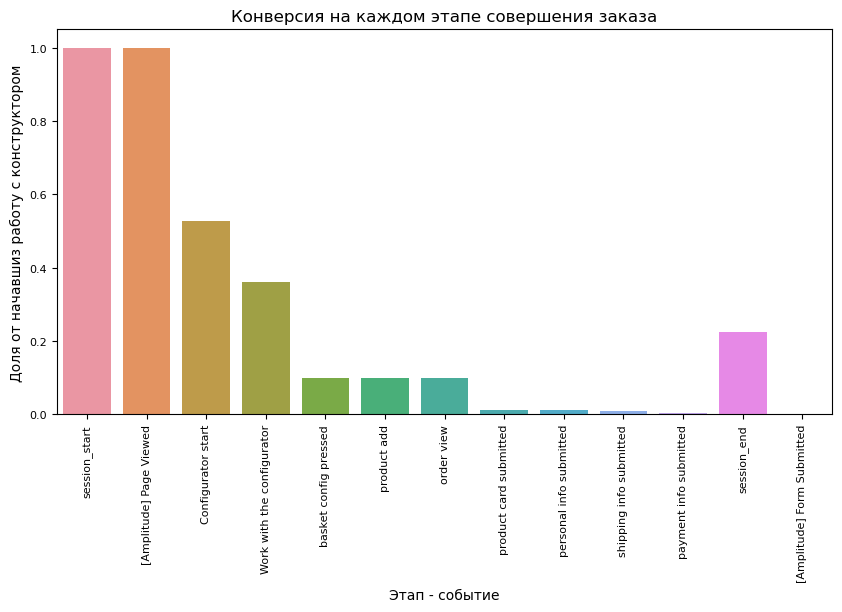

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(data=os_tracklist_ses_ratio.iloc[:, :-1].describe().T.reset_index(), x='event_type', y = 'mean')
plt.title('Конверсия на каждом этапе совершения заказа')
plt.xlabel('Этап - событие')
plt.ylabel('Доля от начавшиз работу с конструктором')
plt.xticks(rotation=90)
plt.tick_params(labelsize=8)
plt.show()

Какое значение можно считать оптимальным для конверсии? Какая доля пользователей, зашедших на сайт должна совершить покупку? В зависимсоти от источника и бизнеса информация отличается. Где-то считается нормой 1%, где-то 2-3%? Иногда пишут про 10%. Передовики продаж утверждают, что с конверсией менее 25% можно даже не начинать разговаривать.

Так, что же не так с конверсией?

### 2.3 Гипотезы

Почему вообще модет падать конверсия на каждом этапе в данном примере? Вполне возможно, что:
- пользователи заходят на сайт и просто "играются" с конструктором с надеждой вернуться позже, но не возвращаются. Напомним, что среднее кол-во заходов на сайт составляет 1,3. Или, возможно, дизайн, юзабилити, движок сайта оставляет желать лучшего. Например, сайт не оптимизирован под мобильные устройства, сайт неадаптирован. **Невозможно проверить**
- на различных стадиях происходят ошибки, например, не загружается конструктор (в 40% случаев), не загружается корзина и просмотр товаров (в 90% случаев), не работает страница заказа (в 99% случаев). **Ошибки не выявлены**
- между этапами (событиями) проходит слишком много времени и пользователи отваливаются. **Невозможно точно оценить**

А возможно вообще неверно настроен трекинг и на самом деле с конверсией всё впорядке. **Недостаточно данных, свойства не содержат подробную информацию**

Проверим основные версии

#### 2.3.1  Ошибки сервисов сайта

Проверку на ошибки можно провести, если посмотреть на свойства событий.Убедимся, что в свойствах нет никаких ошибок. Например, на стадиях добавления продукта в корзину, просмотра корзины, ввода различных данных, завершения платежа.

У каждого события одинаковые по структуре свойства, поэтому посмотрим на 1 случайное свойство каждого события, где это свойство не пустое

In [22]:
properties = df[['event_type', 'event_properties']]

In [23]:
# вывод случайных значений событий
properties.groupby('event_type').apply(lambda x: x.sample(n=1, random_state=1)).reset_index(drop=True).query('event_properties != "{}"')

,event_type,event_properties
1,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://example.com/ooak-woman-hoodie-configurator?utm_source=Facebook&utm_medium=Ads&utm_campaign=ASC++all+EU+-+all+aud+-+no+cap+07%2F25%2F2023-28%2F11%2F2023+Campaign&utm_content=ASC++all+EU+-+all+aud+-+no+cap+07%2F25%2F2023-28%2F11%2F2023+Ad+set&retargetinAudience=new_customer&fbclid=PAAaaPr10vBoRT0yx71KhQe6d66XJWjy26i_ifjRpiimaYq-87KSz0PEpgn2o_aem_AYaDx_J1VzL4c1OLTPNqYWE6A_O1fO0HlSF8BGk2JUAILuqiO0wRs7A4CBZ88i43HUM6gwKI-EO2Noj2DoQrHYvF'}"
11,Track order put,{'bitrix_ids': ['2178717']}
12,Work with the configurator,{'pressed button': 'color'}
13,[Amplitude] Form Started,"{'[Amplitude] Form Name._value': 'Jennifer Kimmel', '[Amplitude] Form ID': 'modal-form', '[Amplitude] Form Destination': 'https://example.com/ooak-woman-hoodie-configurator?retargetinAudience=new_customer&fbclid=PAAabkxXpDQsobuXdupZC36OCLu6XucS6Vgq1rgXh0Cm9D601Aal2UaTB5bQw_aem_AdTygOmCaATpJ57DaVmbBcSYjHUQivCq_sBYQWGIa6grDW5qxtX7ehCR3V8DgsvILp9HP7cIKckzhI8TE9Lf3kIs#', '[Amplitude] Form Name._prevClass': 't-input js-tilda-rule'}"
14,[Amplitude] Form Submitted,"{'[Amplitude] Form ID': 'payment-form', '[Amplitude] Form Destination': 'https://example.com/us/ooak-man-hoodie-configurator#growth'}"
15,[Amplitude] Page Viewed,"{'[Amplitude] Page URL': 'https://example.com/us/ooak-man-pants-configurator#growth', 'referrer': 'https://example.com/us/ooak-man-shorts-configurator', '[Amplitude] Page Domain': 'example.com', '[Amplitude] Page Path': '/us/ooak-man-pants-configurator', '[Amplitude] Page Title': 'example - casual pants online configurator', '[Amplitude] Page Location': 'https://example.com/us/ooak-man-pants-configurator#growth', 'referring_domain': 'example.com'}"
22,minus item,"{'product.Cuff': 'Decorative ribbed elastic band', 'product.Sex': 'For her', 'product.height': '177-190', 'order.delivery': 'free', 'order.size': 2, 'product.Hood': 'Dragon hood', 'order.discount': 102, 'product.Pocket': 'No pockets', 'product.Style': 'Oversize', 'order.total_price': 278, 'order.delivery_price': 0, 'product.Hem': 'No elastic band', 'product.Size': 'M', 'product.color': 'Green', 'product.Length': 'Mid-length', 'product.fabric': 'With nap (insulated)'}"
24,order view,"{'product.order.delivery': 'pickup', 'product.product.color': 'Black', 'product.product.Pocket': 'Side pockets', 'product.product.Back': 'No pockets', 'product.product.Fabric': 'With nap (insulated)', 'product.product.height': '177-190', 'product.order.discount': 77, 'product.product.Sex': 'For Her', 'product.order.size': 2, 'product.product.Size': 'L', 'product.order.delivery_price': 0, 'product.order.total_price': 238, 'product.product.Waist': 'Decorative ribbed elastic band', 'product.product.Cuff': 'Thin elastic cuffs', 'product.product.Style': 'Cargo'}"
26,payment info submitted,"{'order.delivery_price': 0, 'order.delivery': 'free', 'order.size': 3, 'shipping': 'free', 'order.discount': 203, 'paymentType': 'stripe', 'order.total_price': 407}"
27,personal info submitted,"{'order.delivery_price': 0, 'order.delivery': 'free', 'order.size': 1, 'phone': ' + 12 432 4017638639946', 'name': 'Rand Generator NamesSarah Glück', 'order.discount': 26, 'email': 's.glueck82029380432412@example.com', 'order.total_price': 139}"


Как видно из приведенной таблицы, ошибки в свойствах отсутствуют (хотя это было бы понятно и после анализа таблицы свойств событий, но мы убедились), поэтому однозначного вывода о том, что сайт как-то работает некорректно, сделать невозможно. 

Т.о. нельзя подтвердить или опровергнуть гипотезу о том, что конвесрия падает, количество пользователей, которые доходят до покупки товара, уменьшается в 100-1000 раз из-за нестабильной работы сервисов.

#### 2.3.2  Стоимость доставки
Детально рассмотрим значения свойств некоторых событий

In [24]:
# создадим список событий
event_list = ['order view', 'personal info submitted', 'shipping info submitted', 'payment info submitted']
# циклом выведем свойства
for i in event_list:
    data = df.query('event_type == @i')['event_properties'].reset_index()
    data = data['event_properties'].str.split(',', expand = True)
    display(i)
    display(data.head(3))

'order view'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,{'product.order.delivery': 'free','product.product.color': 'Green','product.product.Pocket': 'Side pockets','product.product.height': '164-176','product.order.discount': 52,'product.product.Sex': 'For her','product.order.size': 2,'product.product.Size': 'L','product.product.Hood': 'Hyper large','product.product.Hem': 'Elastic band with drawstring','product.order.delivery_price': 0,'product.order.total_price': 278,'product.product.Cuff': 'Decorative ribbed elastic band','product.product.fabric': 'With nap (insulated)','product.product.Style': 'Oversize','product.product.Length': 'Mid-length'},None
1,{'product.order.delivery': 'free','product.product.color': 'Coffee','product.product.Pocket': 'Kangaroo pocket','product.product.height': '153-163','product.order.discount': 26,'product.product.Sex': 'For her','product.order.size': 1,'product.product.Size': 'S','product.product.Hood': 'Cat hood','product.product.Hem': 'Decorative ribbed elastic band','product.order.delivery_price': 0,'product.order.total_price': 139,'product.product.Cuff': 'Decorative ribbed elastic band','product.product.fabric': 'With nap (insulated)','product.product.Style': 'Straight','product.product.Length': 'Short'},None
2,{'product.order.delivery': 'free','product.product.color': 'Lavender','product.product.Pocket': 'Kangaroo pocket','product.product.height': '153-163','product.order.discount': 52,'product.product.Sex': 'For her','product.order.size': 2,'product.product.Size': 'S','product.product.Hood': 'Overlapped without a drawstring','product.product.Hem': 'Decorative ribbed elastic band','product.order.delivery_price': 0,'product.order.total_price': 278,'product.product.Cuff': 'Decorative ribbed elastic band','product.product.fabric': 'With nap (insulated)','product.product.Style': 'Straight','product.product.Length': 'Short'},None


'personal info submitted'

,0,1,2,3,4,5,6,7
0,{'order.delivery_price': 0,'order.delivery': 'free','order.size': 1,'phone': ' + 12 432 4627301283','name': 'Rand Generator NamesFelipe Barbosa de Oliveira','order.discount': 26,'email': 'fbarbosa84029380432412@example.com','order.total_price': 139}
1,{'order.delivery_price': 0,'order.delivery': 'pickup','order.size': 1,'phone': ' + 12 432 431627301283','name': 'Rand Generator NamesFelipe Barbosa','order.discount': 26,'email': 'fbarbosa84029380432412@example.com','order.total_price': 139}
2,{'order.delivery_price': 0,'order.delivery': 'pickup','order.size': 1,'phone': ' + 12 432 4+44 7738 112573','name': 'Rand Generator NamesAbigail Wynn-Jones','order.discount': 26,'email': 'abiwynnjones029380432412@example.com','order.total_price': 139}


'shipping info submitted'

,0,1,2,3,4,5
0,{'order.delivery_price': 29,'order.delivery': 'dhldelivery','order.size': 1,'shipping': 'dhldelivery','order.discount': 26,'order.total_price': 139}
1,{'order.delivery_price': 14,'order.delivery': 'tntdelivery','order.size': 1,'shipping': 'tntdelivery','order.discount': 81,'order.total_price': 149}
2,{'order.delivery_price': 14,'order.delivery': 'tntdelivery','order.size': 1,'shipping': 'tntdelivery','order.discount': 26,'order.total_price': 139}


'payment info submitted'

,0,1,2,3,4,5,6
0,{'order.delivery_price': 14,'order.delivery': 'tntdelivery','order.size': 1,'shipping': 'tntdelivery','order.discount': 26,'paymentType': 'stripe','order.total_price': 139}
1,{'order.delivery_price': 29,'order.delivery': 'dhldelivery','order.size': 1,'shipping': 'dhldelivery','order.discount': 26,'paymentType': 'paypal','order.total_price': 139}
2,{'order.delivery_price': 0,'order.delivery': 'free','order.size': 3,'shipping': 'free','order.discount': 217,'paymentType': 'stripe','order.total_price': 417}


Рассмотрим свойство 'order_delivery_price'. На этапе добавления товара в корзину, просмотра заказа, ввода персональных данных стоимость доставки равно 0 (0 или free), однако на стадии оформления доставки, ввода платежной информации доставка уже не бесплатная. По крайней мере не во всех случаях. На примере случайной сессии покажем, что после ввода данных о доставке и платежной информации стоиомость доставки части заказа увеличилась и не равна 0.

In [25]:
for i in event_list:
    data = df.query('(event_type == @i)  & (session_id == 1699602562341)')['event_properties'].reset_index()
    data = data['event_properties'].str.split(',', expand = True)
    display(i)
    display(data.head(3))

'order view'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,{'product.order.delivery': 'free','product.product.color': 'Lavender','product.product.Pocket': 'Kangaroo pocket','product.product.height': '164-176','product.order.discount': 26,'product.product.Sex': 'For her','product.order.size': 1,'product.product.Size': 'L','product.product.Hood': 'Overlapped without a drawstring','product.product.Hem': 'Elastic band','product.order.delivery_price': 0,'product.order.total_price': 139,'product.product.Cuff': 'No elastic band','product.product.fabric': 'No nap','product.product.Style': 'Classic','product.product.Length': 'Mid-length'}


'personal info submitted'

,0,1,2,3,4,5,6,7
0,{'order.delivery_price': 0,'order.delivery': 'free','order.size': 1,'phone': ' + 12 432 43509649036','name': 'Rand Generator NamesLuca','order.discount': 26,'email': 'maycbfw029380432412@example.com','order.total_price': 139}
1,{'order.delivery_price': 0,'order.delivery': 'pickup','order.size': 2,'phone': ' + 12 432 43509649036','name': 'Rand Generator NamesLuca','order.discount': 191,'email': 'maycbfw029380432412@example.com','order.total_price': 278}
2,{'order.delivery_price': 0,'order.delivery': 'pickup','order.size': 2,'phone': ' + 12 432 43509649036','name': 'Rand Generator NamesLuca','order.discount': 191,'email': 'maycbfw029380432412@example.com','order.total_price': 278}


'shipping info submitted'

,0,1,2,3,4,5
0,{'order.delivery_price': 0,'order.delivery': 'free','order.size': 2,'shipping': 'free','order.discount': 191,'order.total_price': 278}
1,{'order.delivery_price': 0,'order.delivery': 'free','order.size': 2,'shipping': 'free','order.discount': 191,'order.total_price': 278}
2,{'order.delivery_price': 29,'order.delivery': 'dhldelivery','order.size': 1,'shipping': 'dhldelivery','order.discount': 26,'order.total_price': 139}


'payment info submitted'

,0,1,2,3,4,5,6
0,{'order.delivery_price': 0,'order.delivery': 'free','order.size': 2,'shipping': 'free','order.discount': 191,'paymentType': 'stripe','order.total_price': 278}
1,{'order.delivery_price': 29,'order.delivery': 'dhldelivery','order.size': 1,'shipping': 'dhldelivery','order.discount': 26,'paymentType': 'stripe','order.total_price': 139}


Как видим в одну сессию 1 пользователь сформировал 2 заказа, для которых на стадии добавления в корзину и просмотра заказа стоимость доставки равнялась 0, при этом при оформлении заказа доставка части товаров стала стоить 29 у.е.

О чем это может свидетельствовать? 
1) О том, что все в порядке и такие условия доставки, которая рассчитывается на стадии ввода адресных данных и схемы работы складов, с которых доставляются части заказа/заказы в целом. Для каких-то товаров, хранящизся близко к заказчику, стоимость доставки равна 0 или пользователь сам забирает заказ, или доставка осуществляется за счет платформы, а не поставщика.

Т.е. вполне вероятно, что появление на данном этапе стоимостных характеристик доставки - стандартная практика известная пользователю, которая никак не влияет на отток

2) С другой стороны, пользователь в момент создания заказа, при первоначальном оформлении видел информацию о том, что доставка стоит 0 у.е, возможно на сайте висит информация, что доставка бесплатна, некий призыв к действию "оформи сейчас и мы доставим бесплатно", но на этапе ввода адресных данных информация о доставке меняется, что разочаровывает пользователя и он завершает заказ без осуществления покупки.  

Так, просмотр заказа произведен в 1431 сессии, 381 сессия содержит событие с началом оформеления заказа, 200 сессий - с вводом персданных, 169 сессий - с вводом адресов и только 84 сессии - платежной информации

Т.о. однозначно утверждать, что каким-то образом не оправдываются надежды пользователя на бесплатную доставку , что это влияет на отток, также нельзя. По крайне мере для такого вывода у нас недостаточно данных.

#### 2.3.2 Время сессий

Рассчитаем время длительности сессии.

Определим начальное время сессии и расчитаем разность между началом сессии и каждым последующием событием.
За начало сессии будем брать событие [Amplitude] Page Viewed, т.к. таких событий немного больше, чем событий 'session_start'

In [26]:
# создадим массив с собыитиями и временем событий 
first_time = df[df['event_type'] == "[Amplitude] Page Viewed"][['session_id', 'client_event_time']]
# выделим минимальное время события [Amplitude] Page Viewed
first_time = first_time.groupby('session_id')['client_event_time'].min().reset_index()
# переименуем столбец
first_time = first_time.rename(columns = {'client_event_time' : 'first_time'})
# объединим датафремй
df = df.merge(first_time, on='session_id')

In [27]:
# рассчитаем новый показатель
df['delta_time'] = df['client_event_time'] - df['first_time']
# переведем в секунды
df['delta_time'] = df['delta_time'].dt.total_seconds()
# добавим расчет в минутах
df['delta_time_m'] = df['delta_time'] / 60

In [28]:
df.groupby('event_type')['delta_time_m'].mean().reset_index().sort_values(by = 'delta_time_m', ascending=False)

,event_type,delta_time_m
14,[Amplitude] Form Submitted,13.366873
26,payment info submitted,11.465022
36,shipping info submitted,9.668413
13,[Amplitude] Form Started,9.445937
27,personal info submitted,8.671607
32,product removed,7.472728
19,contact footer pressed,7.056898
33,review pressed,6.983583
25,payment and delivered footer pressed,6.587138
21,how to order footer pressed,6.586863


Т.о. после начала сессии проходит в среднем:
- 2,8 минуты до начала работы с конфигуратором
- 5,6 минут до добавления товара в корзину и просмотра заказа
- 8,6 минут до отправки персональных данных
- 9,6 минту до отправки данных о доставке
- 11,5 минут до отправки платежной информации и 13 до завершения заказа

На мой взгляд (судя из моего опыта), время сессий вполне себе стандартное. Большая часть событий длится не более 20 минут

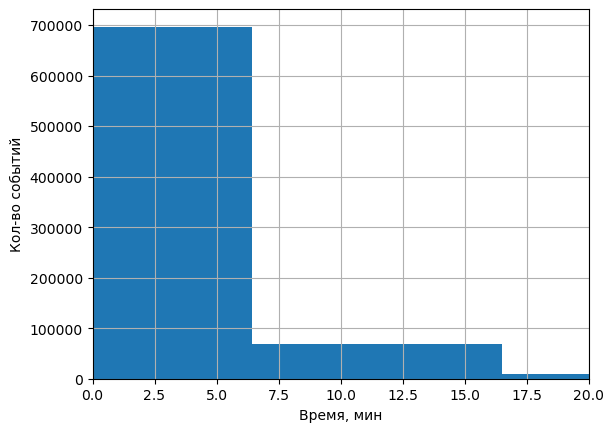

In [29]:
plt.figure()
df['delta_time_m'].hist(bins=100)
plt.xlabel('Время, мин')
plt.ylabel('Кол-во событий')
plt.xlim(0,20)
plt.show()

Посмотрим на распределение времени по события, отбросив события дольше 20 минут. Среднее время сократится, но в целом останется равномерно распределенным по событиям. 

Поэтому, утверждать, что происходит отток пользователей, потому что у сайта сишком долгий отклик, пользователь устает ждать, также нельзя.

In [30]:
df.query('delta_time_m <= 20').groupby('event_type')['delta_time_m'].mean().reset_index().sort_values(by = 'delta_time_m', ascending=False)

,event_type,delta_time_m
14,[Amplitude] Form Submitted,8.274624
26,payment info submitted,8.031296
36,shipping info submitted,6.916150
13,[Amplitude] Form Started,6.393317
27,personal info submitted,6.352585
23,offer doc pressed,6.271261
32,product removed,5.940252
0,Add another one pressed,5.379276
31,product card submitted,5.198739
24,order view,4.999167


#### 2.3.4 Ошибки трекера

Проверим свойста пользователя. Рассмотрим случайные события.

In [31]:
df.query('session_id == 1699602562341')['user_properties'].unique()

array(["{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"],
      dtype=object)

In [32]:
df.query('session_id == 1699357262298')['user_properties'].unique()

array(['{}',
       "{'fbclid': 'PAAaYak5VMrQT9-qjsTCVVHonZi9_75FP_2KrM1DUiFeqLJ4YMhbXLvn9jU-Q', 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'l.instagram.com', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'referrer': 'https://l.instagram.com/', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'PAAaYak5VMrQT9-qjsTCVVHonZi9_75FP_2KrM1DUiFeqLJ4YMhbXLvn9jU-Q', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'https://l.instagram.com/', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'referring_domain': 'l.instagram.com'}"],
      dtype=object)

Т.е. свойство пользователя уникально и не зависит от типа события и др. параметров

In [33]:
user_properties = df[['event_type', 'user_properties']]
# вывод случайных значений событий
user_properties.groupby('event_type').apply(lambda x: x.sample(n=1, random_state=1)).reset_index(drop=True) #.query('event_properties != "{}"')

,event_type,user_properties
0,Add another one pressed,"{'fbclid': 'PAAabbHG4BtasOTQH-kH7RDDObvLENC_4DOJyMqe1axA3Kfc_EbG8Yg46QZOw_aem_AekgS4YfzMX6cBcZAX9eMJ8WALpB8lgC3RuXZK3WJNghoChJEpAnF7AReH1D5Qx_dFU2cgm9omiGME6tS6JtViaQ', 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'instagram.com', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'referrer': 'http://instagram.com/', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'PAAabbHG4BtasOTQH-kH7RDDObvLENC_4DOJyMqe1axA3Kfc_EbG8Yg46QZOw_aem_AekgS4YfzMX6cBcZAX9eMJ8WALpB8lgC3RuXZK3WJNghoChJEpAnF7AReH1D5Qx_dFU2cgm9omiGME6tS6JtViaQ', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'http://instagram.com/', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'referring_domain': 'instagram.com'}"
1,Configurator start,"{'fbclid': 'PAAabsvaTRZGfN55gF3nyWUiducBDaf2mrMCJyARy-V_qFxeiJioDjqRaKDeM_aem_AZmdPo-CZ9YMIySLVn_MAVFl6QVJWk4YwqrcgNrWVM_gCCHD4621PWOOKqfcjJfttYSl16YH9vcLQHij-hbID1KS', 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'instagram.com', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'referrer': 'http://instagram.com/', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'PAAabsvaTRZGfN55gF3nyWUiducBDaf2mrMCJyARy-V_qFxeiJioDjqRaKDeM_aem_AZmdPo-CZ9YMIySLVn_MAVFl6QVJWk4YwqrcgNrWVM_gCCHD4621PWOOKqfcjJfttYSl16YH9vcLQHij-hbID1KS', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'http://instagram.com/', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'referring_domain': 'instagram.com'}"
2,FAQ 1,"{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'kwork.ru', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'https://kwork.ru/', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}"
3,FAQ 2,"{'fbclid': 'PAAabDhpGkND__aozVLb-SstPaRcVpVVVLbhITJ8ovKV2yniu86CymBrlYlS4_aem_AfW3proxKtuJEvU2W1eNbSKxoIQwFyaXHwEgIt3taofzh_rU5Ow6qlNLyq535JmxyPw', 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'l.instagram.com', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'referrer': 'https://l.instagram.com/', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'PAAabDhpGkND__aozVLb-SstPaRcVpVVVLbhITJ8ovKV2yniu86CymBrlYlS4_aem_AfW3proxKtuJEvU2W1eNbSKxoIQwFyaXHwEgIt3taofzh_rU5Ow6qlNLyq535JmxyPw', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'https://l.instagram.com/', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'referring_domain': 'l.instagram.com'}"
4,FAQ 3,"{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'kwork.ru', 'initial_utm_content': 'EMPTY', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY', 'referrer': 'https://kwork.ru/', 'initial_gclid': 'EMPTY', 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_referrer': 'https://kwork.ru/', 'initial_gbraid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY', 'referring_domain': 'kwork.ru'}"
5,FAQ 4,"{'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY', 'initial_utm_content

Как видим, большая часть паарметров - пустые значения, либо utm метки характеризующие источник трафика, либо метки gclid, yclid, ymclid, fbclid и пр, которые не зависят от трекера.

Т.о. проверить правильность настроек меток трекера невозможно, и выявить факт того, что некорректная работа трекера искажает данные и показывает неправильную конверсию, также невозможно.

## 3 Выводы

В рамках анализа данных было выявлено, что из 100% пользователей, зашедших на сайт:
- в среднем работу с конфигуратором начинают 52% пользователей, 
- добавляют товар в корзину - 9 %,
- вводят персональные данные и данные о доставке 1,1%, 
- платежную информацию - 0,3%, 
- завершают процесс оплаты - 0,2%

Т.о. крайне низкий % пользователей осуществляют покупку на сайте. В основной массе пользователи используют мобильные устройства для взаимодействия с сайтом и основной источник трафика - Instagram.

Были сформулированы гипотезы о причинах низкой конверсии:
- на различных стадиях происходят ошибки, например, не загружается конструктор (в 40% случаев), не загружается корзина и просмотр товаров (в 90% случаев), не работает страница заказа (в 99% случаев). 
- между этапами (событиями) проходит слишком много времени и пользователи отваливаются. 
- неверно настроен трекинг

Однако:
- при анализе свойств событий каких-либо ошибок не выявлено, поэтому утверждать, что есть ошибки нельзя, т.к. данные не содержат подобных сведений
- между этапами (событиями) отсутсуют какие-либо аномальные значения времени, т.е. в среднем пользователи равномерно/плавно пеерходят на следующее событие и совершают заказ.
- при анализе свойст событий также не выявлены какие-то дефекты настроек трекера. Данных не достаточно для подстверждения гипотезы
- также невозможно подтвердить дополнительную гипотезу о том, что на уход пользователей влияет недостоверность информации о стоимости доставки. Данных недостаточно.

Основной отток пользователей происходит на этапе добавления товара в корзину и дальнейшего преехода в стадию оформление заказа.
Вероятнее всего, пользователи заходят на сайт и просто "играются" с конструктором с надеждой вернуться позже, но не возвращаются. Среднее кол-во заходов на сайт составляет 1,3. 
Также, возможно, дизайн, юзабилити, движок сайта не оптимизированы под мобильные устройства, сайт неадаптирован. Но это невозможно проверить без работы с источником. Очень может быть, что в дейсвтительности происходит ошибка в конструкторе, не позволяющая перейти в оформление заказа или неактивна кнопка офомрления заказа, если пользователь неавторизован 